In [1]:
using BenchmarkTools
using LazySets
using SparseArrays
using Plots
using ReachabilityAnalysis: LGG09
include("src/CarlemanLinearization.jl")
using .CarlemanLinearization: _template, _solve_CARLIN, build_matrix

In [2]:
# The same model we considered before
@show A = 0.1
@show B = 10.0

@show x0 = 0.2
@show y0 = B * x0^2

F1 = zeros(2, 2)
F1[1, 1] = -1.0
F1[2, 2] = -1.0

F2 = zeros(2, 4) # [x, x⊗x]
F2[1, 2] = A / B
F2[2, 4] = A / B;

A = 0.1 = 0.1
B = 10.0 = 10.0
x0 = 0.2 = 0.2
y0 = B * x0 ^ 2 = 0.4000000000000001


In [3]:
n = 2
N = 4
Tmax = 3.0
rr0 = [1/√A - 0.5, B/(1/√A - 0.5)^2]
resets = 4
bloat = false
δ = 0.1
X0 = Hyperrectangle([x0, y0], rr0);

In [4]:
# the old version
dirs = _template(n=n, N=N, compress=false)
alg = LGG09(δ=δ, template=dirs)
@btime _solve_CARLIN(X0, F1, F2; alg=alg, N=N, T=Tmax, bloat=bloat, compress=false);
sol_old = _solve_CARLIN(X0, F1, F2; alg=alg, N=N, T=Tmax, bloat=bloat, compress=false);

  3.444 ms (3460 allocations: 1.08 MiB)


In [5]:
# the new version, with smaller matrix
dirs = _template(n=n, N=N)
alg = LGG09(δ=δ, template=dirs)
@btime _solve_CARLIN(X0, F1, F2; alg=alg, N=N, T=Tmax, bloat=bloat);
sol_new = _solve_CARLIN(X0, F1, F2; alg=alg, N=N, T=Tmax, bloat=bloat);

  1.075 ms (4167 allocations: 500.06 KiB)


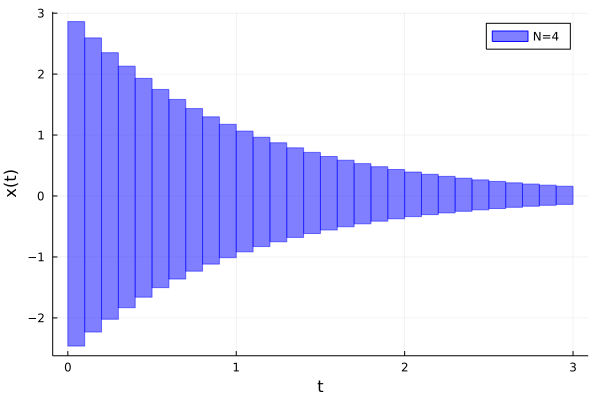

In [6]:
X = plot(sol_old, vars=(0, 1), lab="N=$N", alpha=0.5, c=:blue, lc=:blue, xlab="t", ylab="x(t)",)

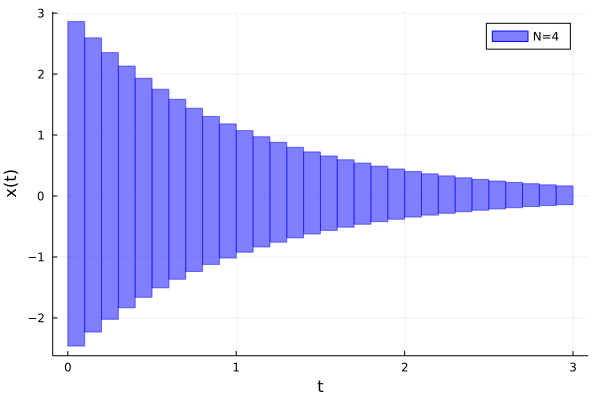

In [7]:
X = plot(sol_new, vars=(0, 1), lab="N=$N", alpha=0.5, c=:blue, lc=:blue, xlab="t", ylab="x(t)",)